### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'Saccharose hydrolysis'

In [16]:
integrals_path = '../../mnova_integrals/sucrose_better_baseline_constant_region_sizes_calki.csv'

reagents_names = ['saccharose', 'alpha-glucose','beta-glucose', 'fructose']

integrals_separator = ','

output_path = '../../mnova_integrals/'

#### Mixture in time

In [20]:
integrals = pd.read_csv(integrals_path, sep = integrals_separator, skiprows=2).iloc[:,[2,4,6,8]]
integrals.fillna(0., inplace=True)
integrals.columns = ['saccharose', 'alpha-glucose', 'beta-glucose', 'fructose']

In [22]:
integrals[integrals < 0] = 0

In [23]:
integrals

,saccharose,alpha-glucose,beta-glucose,fructose
0,51.049167,0.048710,0.010364,0.029105
1,50.986505,0.075655,0.011411,0.074084
2,50.932221,0.098318,0.009855,0.077647
3,51.076414,0.118059,0.010687,0.067180
4,50.986019,0.122927,0.010848,0.078415
...,...,...,...,...
1018,9.840785,3.946724,1.234089,23.648014
1019,9.410941,3.640959,1.144884,27.794347
1020,10.270648,4.085029,1.267191,24.720038
1021,9.474932,3.825599,1.218161,22.868467


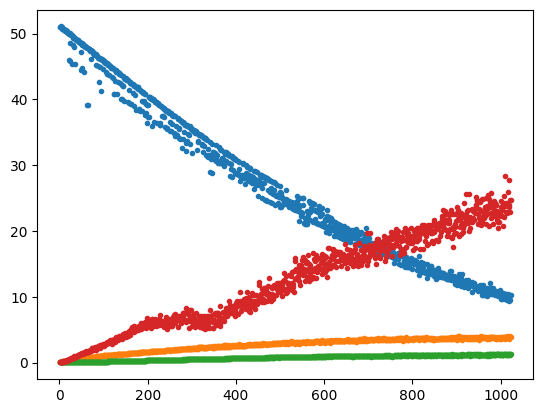

In [24]:
for i in range(integrals.shape[1]):
    plt.plot(range(1,1024), integrals.iloc[:,i], '.')

### Saving preprocessed spectra

In [25]:
integrals.to_csv(output_path + 'sacharoza_calki_nowe.csv', '\t', index=False)